<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report,auc

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

# Dropping the unnecesary ID column
data = data.drop(columns=['customerID'])

**Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
data.shape

(7043, 20)

In [ ]:
for col in data.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{data[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

gender feature has 2 unique values.
Partner feature has 2 unique values.
Dependents feature has 2 unique values.
PhoneService feature has 2 unique values.
MultipleLines feature has 3 unique values.
InternetService feature has 3 unique values.
OnlineSecurity feature has 3 unique values.
OnlineBackup feature has 3 unique values.
DeviceProtection feature has 3 unique values.
TechSupport feature has 3 unique values.
StreamingTV feature has 3 unique values.
StreamingMovies feature has 3 unique values.
Contract feature has 3 unique values.
PaperlessBilling feature has 2 unique values.
PaymentMethod feature has 4 unique values.
TotalCharges feature has 6531 unique values.
Churn feature has 2 unique values.


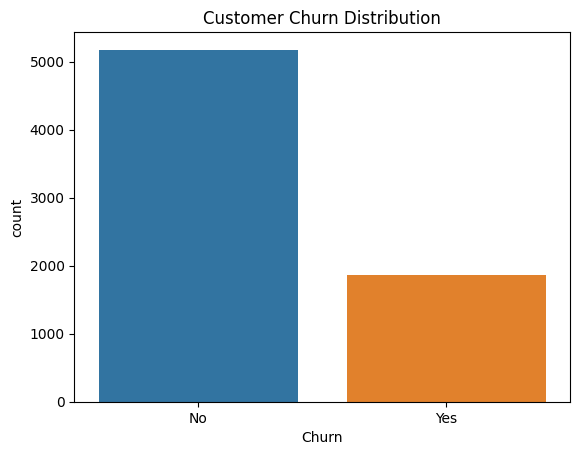

In [ ]:
sns.countplot(x='Churn',data=data,hue='Churn')
plt.title("Customer Churn Distribution")
plt.show()

In [ ]:
np.sum(data['Churn']==1)

0

In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Data Pre-Processing**

---



<ipython-input-12-a6e475a88cbe>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

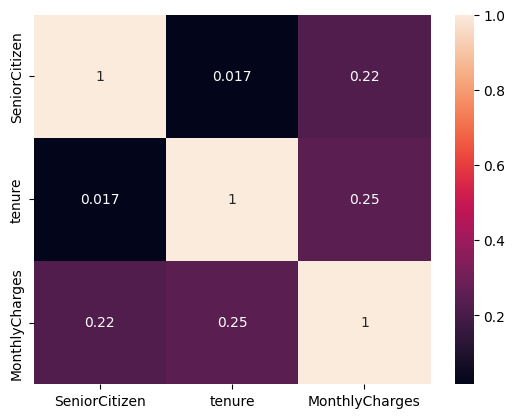

In [ ]:
churn_corr = data.corr()
churn_corr_top = churn_corr.index
sns.heatmap(data[churn_corr_top].corr(), annot=True)

In [ ]:
# Label Encoding

categorical = data.drop(columns=['SeniorCitizen','tenure','MonthlyCharges'])
le = LabelEncoder()
for cols in categorical:
  data[cols] = le.fit_transform(data[cols])

In [ ]:
# Scaling Numerical Features

numerical = ['SeniorCitizen','tenure','MonthlyCharges']
sc = StandardScaler()
for cols in numerical:
  data[[cols]] - sc.fit_transform(data[[cols]])

In [ ]:
# Splitting into train and test datasets
X = data.drop(columns=['Churn'])
y = data['Churn']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

**Implementing Dropout:**

● Begin by constructing a baseline DNN architecture without any dropout layers.

● Introduce dropout layers after each hidden layer with a dropout rate of 0.5.

● Train the model on the provided dataset and evaluate its performance on a
separate validation set.

**Simple Deep Neural Network**

---



In [ ]:
model1 = Sequential()
model1.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 19))
model1.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
model1.add(Dense(1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 120       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model1.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model1.fit(x= x_train, y=y_train,  validation_split=0.8, epochs= 100,  batch_size=500, verbose=2)

Epoch 1/100
3/3 - 3s - loss: 361.3675 - accuracy: 0.7220 - val_loss: 280.4370 - val_accuracy: 0.7378 - 3s/epoch - 851ms/step
Epoch 2/100
3/3 - 0s - loss: 284.7802 - accuracy: 0.7238 - val_loss: 216.8241 - val_accuracy: 0.7374 - 176ms/epoch - 59ms/step
Epoch 3/100
3/3 - 0s - loss: 218.9674 - accuracy: 0.7238 - val_loss: 161.4431 - val_accuracy: 0.7371 - 160ms/epoch - 53ms/step
Epoch 4/100
3/3 - 0s - loss: 161.3629 - accuracy: 0.7220 - val_loss: 114.0522 - val_accuracy: 0.7358 - 262ms/epoch - 87ms/step
Epoch 5/100
3/3 - 0s - loss: 112.8928 - accuracy: 0.7220 - val_loss: 79.0924 - val_accuracy: 0.7345 - 185ms/epoch - 62ms/step
Epoch 6/100
3/3 - 0s - loss: 79.0626 - accuracy: 0.7194 - val_loss: 57.5999 - val_accuracy: 0.7331 - 253ms/epoch - 84ms/step
Epoch 7/100
3/3 - 0s - loss: 57.0305 - accuracy: 0.7176 - val_loss: 39.4694 - val_accuracy: 0.7294 - 171ms/epoch - 57ms/step
Epoch 8/100
3/3 - 0s - loss: 38.3458 - accuracy: 0.7131 - val_loss: 24.1488 - val_accuracy: 0.7063 - 207ms/epoch - 69m

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model1.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

45/45 [==============================] - 0s 7ms/step - loss: 0.6056 - accuracy: 0.7289


accuracy= 0.7288857102394104


In [ ]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test, np.argmax(y_pred1, axis=1))
f11 = f1_score(y_test, np.argmax(y_pred1, axis=1))
roc_auc1 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred1)

45/45 [==============================] - 0s 4ms/step


In [ ]:
y_pred1 = (y_pred1 > 0.5)
y_pred1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

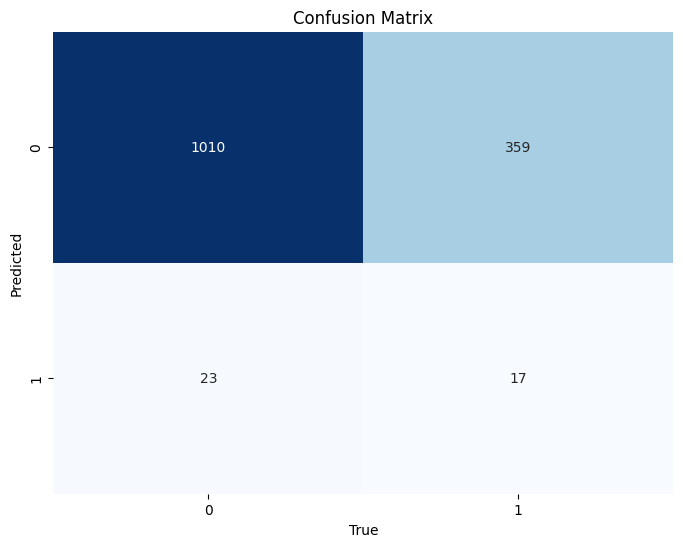

In [ ]:
cm = confusion_matrix(y_pred1,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84      1033
           1       0.42      0.05      0.08       376

    accuracy                           0.73      1409
   macro avg       0.58      0.51      0.46      1409
weighted avg       0.65      0.73      0.64      1409



**Deep Neural Network with Dropout**

---



In [ ]:
model2 = Sequential()
model2.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 19))
model2.add(Dropout(0.5))
model2.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 120       
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model2.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model2.fit(x= x_train, y=y_train,  validation_split=0.33, epochs= 100,  batch_size=10, verbose=2)

Epoch 1/100
378/378 - 5s - loss: 21.9908 - accuracy: 0.6934 - val_loss: 0.5699 - val_accuracy: 0.7441 - 5s/epoch - 13ms/step
Epoch 2/100
378/378 - 2s - loss: 0.5822 - accuracy: 0.7305 - val_loss: 0.5670 - val_accuracy: 0.7441 - 2s/epoch - 5ms/step
Epoch 3/100
378/378 - 2s - loss: 0.5858 - accuracy: 0.7305 - val_loss: 0.5681 - val_accuracy: 0.7441 - 2s/epoch - 4ms/step
Epoch 4/100
378/378 - 3s - loss: 0.5828 - accuracy: 0.7305 - val_loss: 0.5680 - val_accuracy: 0.7441 - 3s/epoch - 7ms/step
Epoch 5/100
378/378 - 2s - loss: 0.5829 - accuracy: 0.7305 - val_loss: 0.5696 - val_accuracy: 0.7441 - 2s/epoch - 5ms/step
Epoch 6/100
378/378 - 2s - loss: 0.5827 - accuracy: 0.7305 - val_loss: 0.5677 - val_accuracy: 0.7441 - 2s/epoch - 4ms/step
Epoch 7/100
378/378 - 2s - loss: 0.5830 - accuracy: 0.7305 - val_loss: 0.5677 - val_accuracy: 0.7441 - 2s/epoch - 4ms/step
Epoch 8/100
378/378 - 2s - loss: 0.5874 - accuracy: 0.7305 - val_loss: 0.5689 - val_accuracy: 0.7441 - 2s/epoch - 4ms/step
Epoch 9/100
37

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model2.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

45/45 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7331


accuracy= 0.7331440448760986


In [ ]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test, np.argmax(y_pred2, axis=1))
f12 = f1_score(y_test, np.argmax(y_pred2, axis=1))
roc_auc2 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred2)

45/45 [==============================] - 0s 5ms/step


In [ ]:
y_pred2 = (y_pred2 > 0.5)
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

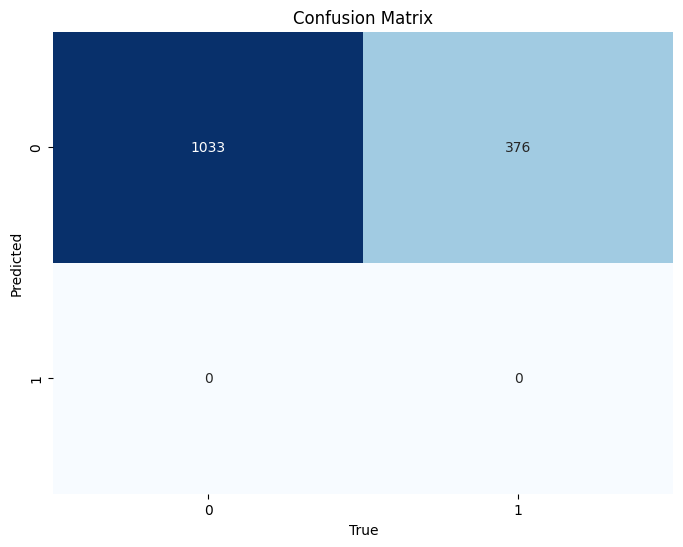

In [ ]:
cm = confusion_matrix(y_pred2,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       376

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Implementing Layer-wise Dropout:**

---



● Modify the DNN architecture to incorporate layer-wise dropout, where dropout is applied after each hidden layer with varying dropout rates (e.g., 0.2, 0.3, 0.4).

● Train the modified model and assess its performance using validation metrics.

In [ ]:
model3 = Sequential()
model3.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 19))
model3.add(Dropout(0.3))
model3.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 120       
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model3.compile(loss='binary_crossentropy',  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
train_history = model3.fit(x= x_train, y=y_train,  validation_split=0.8, epochs= 100,  batch_size=500, verbose=2)

Epoch 1/100
3/3 - 3s - loss: 383.3693 - accuracy: 0.5861 - val_loss: 98.1119 - val_accuracy: 0.7376 - 3s/epoch - 853ms/step
Epoch 2/100
3/3 - 0s - loss: 303.0789 - accuracy: 0.5941 - val_loss: 76.6302 - val_accuracy: 0.7374 - 110ms/epoch - 37ms/step
Epoch 3/100
3/3 - 0s - loss: 223.6803 - accuracy: 0.6359 - val_loss: 49.1463 - val_accuracy: 0.7318 - 77ms/epoch - 26ms/step
Epoch 4/100
3/3 - 0s - loss: 202.9926 - accuracy: 0.5488 - val_loss: 33.3400 - val_accuracy: 0.7316 - 269ms/epoch - 90ms/step
Epoch 5/100
3/3 - 0s - loss: 168.5241 - accuracy: 0.5657 - val_loss: 28.1158 - val_accuracy: 0.7318 - 128ms/epoch - 43ms/step
Epoch 6/100
3/3 - 0s - loss: 123.0016 - accuracy: 0.6226 - val_loss: 17.0276 - val_accuracy: 0.7318 - 112ms/epoch - 37ms/step
Epoch 7/100
3/3 - 0s - loss: 107.4511 - accuracy: 0.6368 - val_loss: 3.4306 - val_accuracy: 0.7056 - 62ms/epoch - 21ms/step
Epoch 8/100
3/3 - 0s - loss: 94.3384 - accuracy: 0.5675 - val_loss: 8.2728 - val_accuracy: 0.3119 - 51ms/epoch - 17ms/step


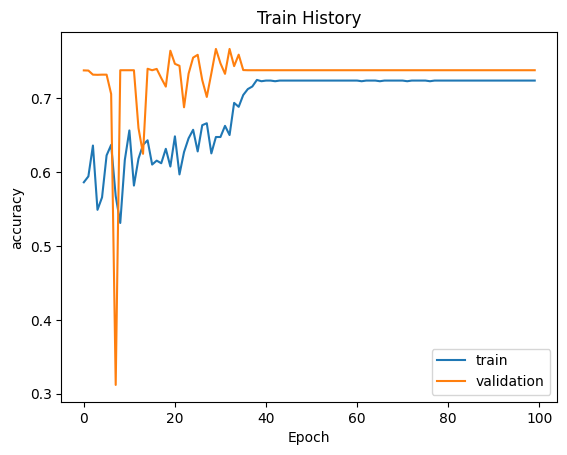

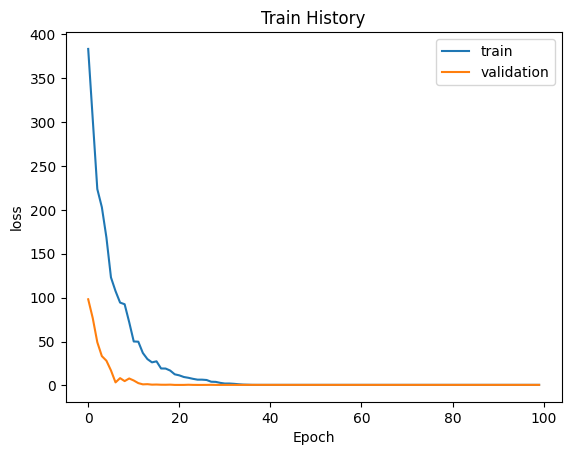

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model3.evaluate(x_test, y_test)
print('\n')
print('accuracy=',scores[1])

45/45 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7331


accuracy= 0.7331440448760986


In [ ]:
y_pred3 = model3.predict(x_test)
accuracy3 = accuracy_score(y_test, np.argmax(y_pred3, axis=1))
f13 = f1_score(y_test, np.argmax(y_pred3, axis=1))
roc_auc3 = roc_auc_score(tf.keras.utils.to_categorical(y_test), y_pred3)

45/45 [==============================] - 0s 1ms/step


In [ ]:
y_pred3 = (y_pred3>0.5)

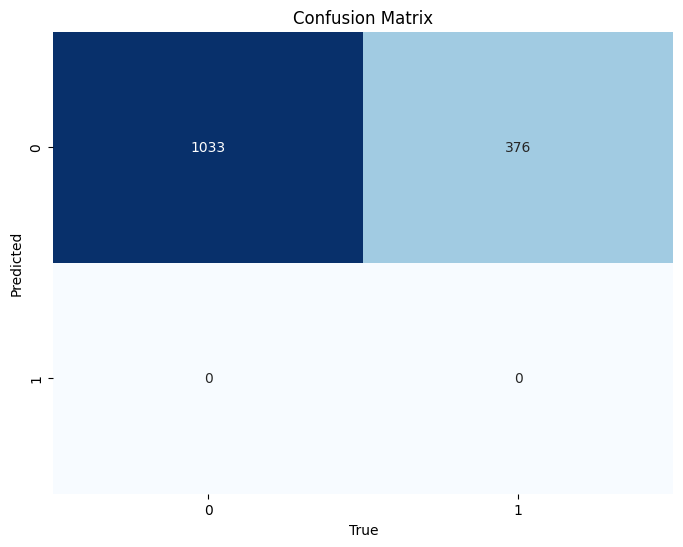

In [ ]:
cm = confusion_matrix(y_pred3,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       376

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Implementing Monte Carlo Dropout:**

---



● Extend the DNN architecture to include Monte Carlo dropout, enabling dropout
during both training and inference phases.

● Train the model using this architecture and evaluate its performance on the
validation set.

In [ ]:
def monte_carlo_inference(model, x, num_samples):
    y_preds = np.zeros((num_samples, x.shape[0], 10))
    for i in range(num_samples):
        y_preds[i] = tf.nn.softmax(model(x, training=True)).numpy()
    return y_preds

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Perform Monte Carlo Dropout inference on test data
y_preds_mc = monte_carlo_inference(model1, x_test, 10)

In [ ]:
y_preds_mc = (y_preds_mc>0.5)

In [ ]:
mean_prediction = np.mean(y_preds_mc, axis=0)
uncertainty = np.std(y_preds_mc, axis=0)

In [ ]:
# Evaluate accuracy
accuracy = np.mean(np.argmax(mean_prediction, axis=1) == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.31%


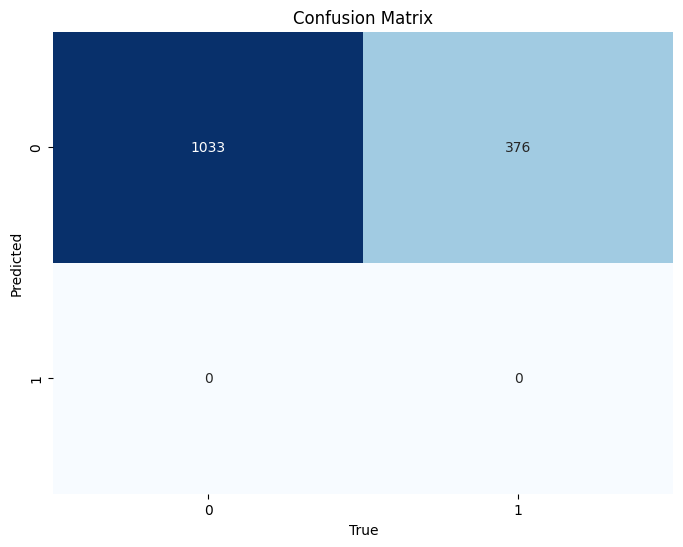

In [ ]:
conf_matrix = confusion_matrix(y_test, np.argmax(mean_prediction, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Comparison and Visualization:**

● Compare the performance metrics (e.g., accuracy, F1 score, ROC curve) of the
three models (baseline, with dropout, with layer-wise dropout, with Monte Carlo
dropout).

● Visualize the training and validation accuracy/loss curves for each model to
observe their convergence and potential overfitting.

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred1)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred1)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test, np.argmax(mean_prediction, axis=1))
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves
plt.plot(fpr1, tpr1, label='Without Regularization (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Applying L1 Regularization (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Applying L2 Regularization (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Applying Elastic Net Regularization (AUC = %0.2f)' % roc_auc4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

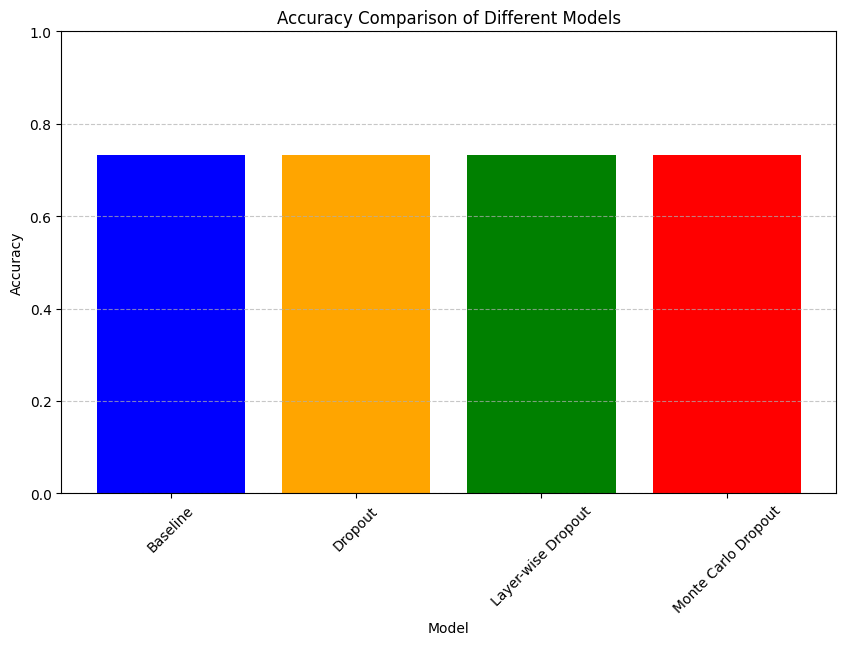

In [ ]:
accuracies = {'Baseline': accuracy1,'Dropout': accuracy2,'Layer-wise Dropout': accuracy3,'Monte Carlo Dropout': accuracy}

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()